Загруженные колонки: ['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_month', 'commissions', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']


Введите значение ставки Банка России (в %):  18
Введите процент инфляции (в %):  14


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 2.946770191192627, acc.: 29.6875] [G loss: [array(2.1828976, dtype=float32), array(2.1828976, dtype=float32), array(0.53125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

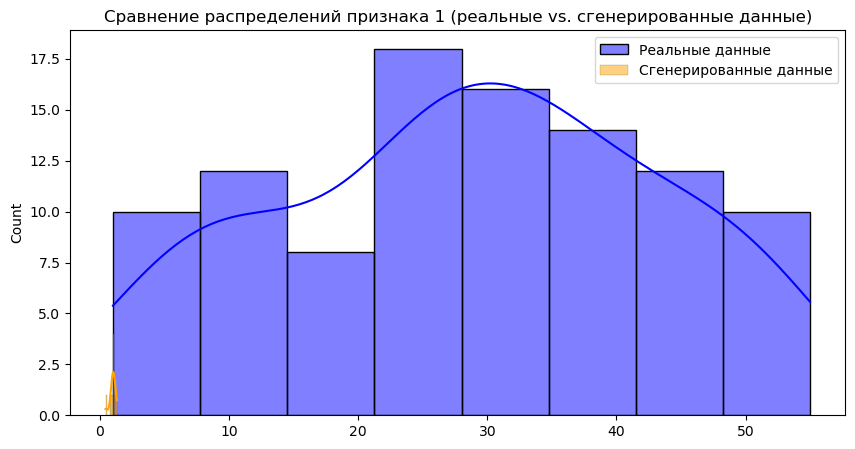

In [3]:
# Генеративно-состязательная сеть (GANs)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Функция для валидации ввода
def validate_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt).replace(",", "."))
            if min_value is not None and value < min_value:
                print(f"Значение должно быть не меньше {min_value}.")
                continue
            if max_value is not None and value > max_value:
                print(f"Значение должно быть не больше {max_value}.")
                continue
            return value
        except ValueError:
            print("Ошибка: Введите корректное число.")

# Загрузка данных
file_path = '/Users/ilyalevshenkov/_GB/GB_Diplom/Sale/Москва_sale_filtered_data.csv'
data = pd.read_csv(file_path)
print(f"Загруженные колонки: {list(data.columns)}")

# Ввод ставки Банка России и процента инфляции с валидацией
bank_rate = validate_input("Введите значение ставки Банка России (в %): ", min_value=0, max_value=100)
inflation_rate = validate_input("Введите процент инфляции (в %): ", min_value=0, max_value=100)

# Обработка данных: корректировка цены на основе ставки банка и инфляции
data['adjusted_price'] = data['price'] * (1 + bank_rate / 100) * (1 + inflation_rate / 100)

# Приведение всех цен к тысячам рублей
data['price'] = data['price'] / 1000  # Приведение цены к тыс. руб.
data['adjusted_price'] = data['adjusted_price'] / 1000  # Приведение скорректированной цены к тыс. руб.

# Обработка категориальных данных
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

# Применяем LabelEncoder к каждой категориальной колонке
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Предобработка данных
X = data.drop(['price', 'adjusted_price'], axis=1)  # Убираем цену и скорректированную цену из признаков
y = data['adjusted_price']  # Целевая переменная — скорректированная цена

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- GAN Implementation -----

# Размерность входных данных
latent_dim = 100

# Функция для создания генератора
def create_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(X_train.shape[1], activation='linear'))  # Выходная размерность соответствует количеству признаков
    return model

# Функция для создания дискриминатора
def create_discriminator():
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))  # Дискриминатор выдаёт вероятность (0 для фейковых, 1 для реальных данных)
    return model

# Компиляция генератора и дискриминатора
discriminator = create_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

generator = create_generator()
gan = Sequential([generator, discriminator])

# Компиляция GAN
discriminator.trainable = False
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# ----- Обучение GAN -----

# Гиперпараметры для обучения
epochs = 1000
batch_size = 32
half_batch = batch_size // 2

# Подготовка данных
real_data = X_train.values  # Используем реальные признаки для обучения дискриминатора

# Обучение GAN
for epoch in range(epochs):
    
    # ----- Обучение дискриминатора -----
    
    # Выбор случайных реальных данных (половина батча)
    idx = np.random.randint(0, real_data.shape[0], half_batch)
    real_samples = real_data[idx]

    # Генерация фейковых данных
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_samples = generator.predict(noise)

    # Метки для реальных и фейковых данных
    real_labels = np.ones((half_batch, 1))
    fake_labels = np.zeros((half_batch, 1))

    # Обучение дискриминатора на реальных и фейковых данных
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ----- Обучение генератора -----
    
    # Генерация шума
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Цель генератора — чтобы дискриминатор думал, что фейковые данные реальные
    valid_labels = np.ones((batch_size, 1))

    # Обучение генератора
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Периодический вывод потерь
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

# Сгенерируем данные после обучения
noise = np.random.normal(0, 1, (10, latent_dim))
generated_data = generator.predict(noise)

# Вывод сгенерированных данных
print("Сгенерированные данные (первые 5 примеров):")
print(generated_data[:5])

# ----- Визуализация -----

# Визуализация распределения реальных и сгенерированных данных
plt.figure(figsize=(10, 5))
sns.histplot(real_data[:, 0], color='blue', label='Реальные данные', kde=True)
sns.histplot(generated_data[:, 0], color='orange', label='Сгенерированные данные', kde=True)
plt.title("Сравнение распределений признака 1 (реальные vs. сгенерированные данные)")
plt.legend()
plt.show()


Загруженные колонки: ['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_month', 'commissions', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']


Введите значение ставки Банка России (в %):  18
Введите процент инфляции (в %):  14


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 10.304008483886719, acc.: 7.8125%] [G loss: [array(7.108944, dtype=float32), array(7.108944, dtype=float32), array(0.09375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

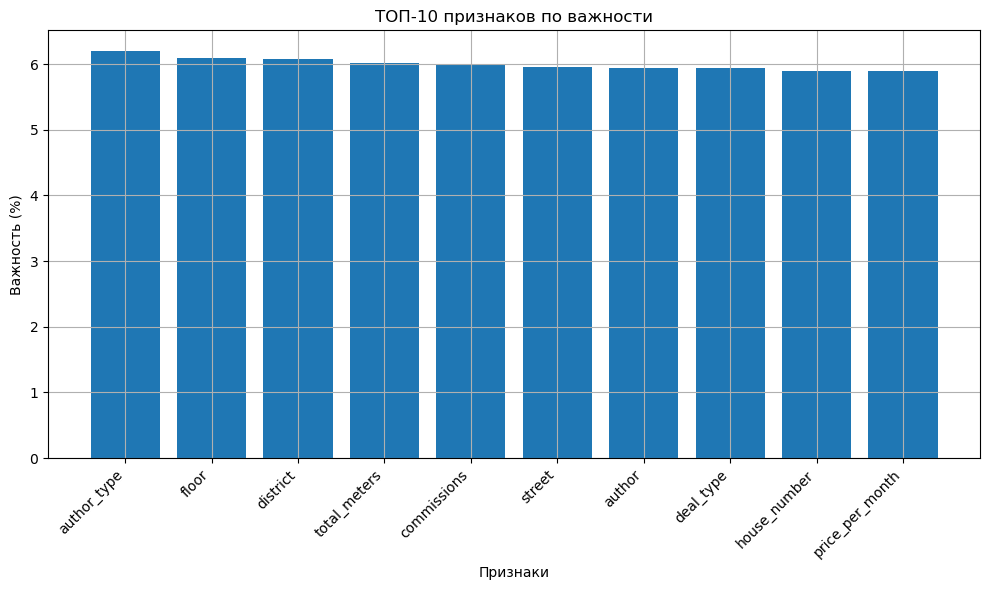

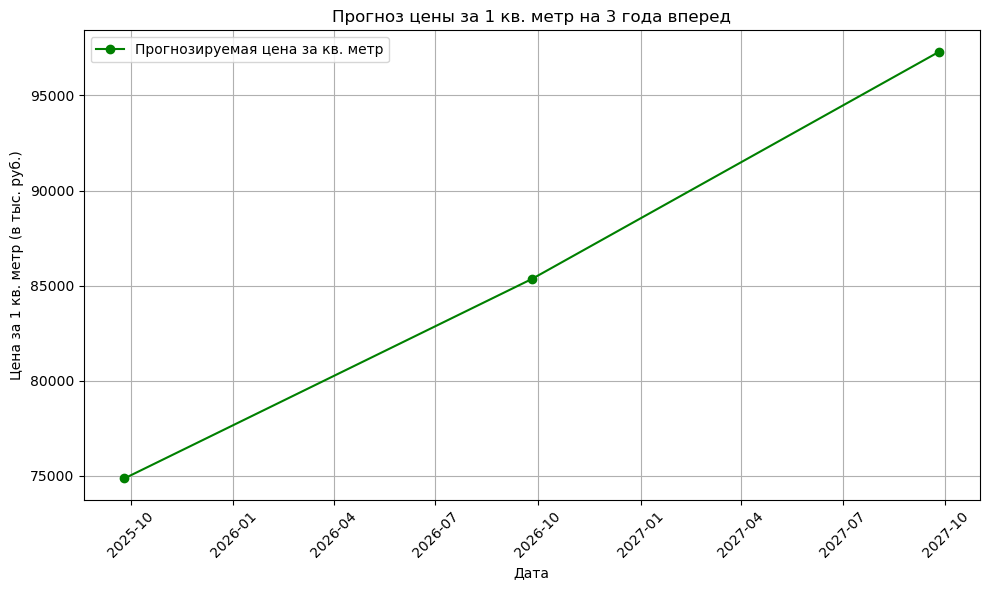

In [10]:
# Генеративно-состязательная сеть (GANs)
# Обучение на выборке 494 объекта

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from datetime import datetime, timedelta

# Функция для валидации ввода
def validate_input(prompt, min_value=None, max_value=None):
    while True:
        try:
            value = float(input(prompt).replace(",", "."))
            if min_value is not None and value < min_value:
                print(f"Значение должно быть не меньше {min_value}.")
                continue
            if max_value is not None and value > max_value:
                print(f"Значение должно быть не больше {max_value}.")
                continue
            return value
        except ValueError:
            print("Ошибка: Введите корректное число.")

# Загрузка данных
file_path = '/Users/ilyalevshenkov/_GB/GB_Diplom/Sale/Москва_sale_filtered_data.csv'
data = pd.read_csv(file_path)
print(f"Загруженные колонки: {list(data.columns)}")

# Ввод ставки Банка России и процента инфляции с валидацией
bank_rate = validate_input("Введите значение ставки Банка России (в %): ", min_value=0, max_value=100)
inflation_rate = validate_input("Введите процент инфляции (в %): ", min_value=0, max_value=100)

# Обработка данных: корректировка цены на основе ставки банка и инфляции
data['adjusted_price'] = data['price'] * (1 + bank_rate / 100) * (1 + inflation_rate / 100)

# Приведение всех цен к тысячам рублей
data['price'] = data['price'] / 1000  # Приведение цены к тыс. руб.
data['adjusted_price'] = data['adjusted_price'] / 1000  # Приведение скорректированной цены к тыс. руб.

# Обработка категориальных данных
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

# Применяем LabelEncoder к каждой категориальной колонке
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Предобработка данных
X = data.drop(['price', 'adjusted_price'], axis=1)  # Убираем цену и скорректированную цену из признаков
y = data['adjusted_price']  # Целевая переменная — скорректированная цена

# Разделение данных на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- GAN Implementation -----

# Размерность входных данных
latent_dim = 100

# Функция для создания генератора
def create_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(X_train.shape[1], activation='linear'))  # Выходная размерность соответствует количеству признаков
    return model

# Функция для создания дискриминатора
def create_discriminator():
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))  # Дискриминатор выдаёт вероятность (0 для фейковых, 1 для реальных данных)
    return model

# Компиляция генератора и дискриминатора
discriminator = create_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

generator = create_generator()
gan = Sequential([generator, discriminator])

# Компиляция GAN
discriminator.trainable = False
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# ----- Обучение GAN -----

# Гиперпараметры для обучения
epochs = 400
batch_size = 32
half_batch = batch_size // 2

# Подготовка данных
real_data = X_train.values  # Используем реальные признаки для обучения дискриминатора

# Обучение GAN
for epoch in range(epochs):
    
    # ----- Обучение дискриминатора -----
    
    # Выбор случайных реальных данных (половина батча)
    idx = np.random.randint(0, real_data.shape[0], half_batch)
    real_samples = real_data[idx]

    # Генерация фейковых данных
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    fake_samples = generator.predict(noise)

    # Метки для реальных и фейковых данных
    real_labels = np.ones((half_batch, 1))
    fake_labels = np.zeros((half_batch, 1))

    # Обучение дискриминатора на реальных и фейковых данных
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ----- Обучение генератора -----
    
    # Генерация шума
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Цель генератора — чтобы дискриминатор думал, что фейковые данные реальные
    valid_labels = np.ones((batch_size, 1))

    # Обучение генератора
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Периодический вывод потерь
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}%] [G loss: {g_loss}]")

# Сгенерируем данные после обучения
noise = np.random.normal(0, 1, (10, latent_dim))
generated_data = generator.predict(noise)

# Вывод сгенерированных данных
print("Сгенерированные данные (первые 5 примеров):")
print(generated_data[:5])

# ----- Визуализация ТОП-10 ключевых данных -----

# Извлечение весов из первого слоя дискриминатора
weights = discriminator.layers[0].get_weights()[0]  # Форма: (количество признаков, 512)
feature_importance = np.mean(np.abs(weights), axis=1)  # Важность каждого признака

# Сортировка и выбор ТОП-10
num_features = min(len(X.columns), 10)  # Ограничиваем количество признаков до 10 или доступного числа
indices = np.argsort(feature_importance)[::-1][:num_features]  # Индексы для ТОП-10
top_importances = feature_importance[indices] / np.sum(feature_importance) * 100  # Важность в процентах

# Визуализация ТОП-10 признаков по важности
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances, align="center")
plt.xticks(range(len(top_importances)), [X.columns[i] for i in indices], rotation=45, ha="right")
plt.title("ТОП-10 признаков по важности")
plt.xlabel("Признаки")
plt.ylabel("Важность (%)")
plt.tight_layout()
plt.grid()
plt.show()

# ----- График прогноза цены 1 кв. метра на три года вперед -----

# Прогноз стоимости 1 кв. метра на 3 года вперед
current_date = datetime.now()  # Используем текущее время как дату загрузки
future_dates = [current_date + timedelta(days=365 * i) for i in range(1, 4)]

# Используем среднюю цену за квадратный метр для прогнозирования
average_price_per_sqm = data['adjusted_price'].mean()  # Измените на вашу колонку, содержащую цену за кв. метр

# Прогнозируемая стоимость с учетом инфляции
future_prices = []
for date in future_dates:
    average_price_per_sqm *= (1 + inflation_rate / 100)  # Увеличиваем цену на процент инфляции
    future_prices.append(average_price_per_sqm)

# Визуализация прогноза стоимости 1 кв. метра
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_prices, marker='o', color='green', label='Прогнозируемая цена за кв. метр')
plt.title("Прогноз цены за 1 кв. метр на 3 года вперед")
plt.xlabel("Дата")
plt.ylabel("Цена за 1 кв. метр (в тыс. руб.)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
